In [ ]:
import io
import json
import numpy as np
import pandas as pd
import random
import re
import tensorflow as tf
import unicodedata

from google.colab import files
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Data Cleaning

In [ ]:
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string


In [ ]:
df = pd.read_csv('cleaned.csv',encoding='utf-8', sep=',',  names=['English', 'Marathi'])

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  41029 non-null  object
 1   Marathi  41029 non-null  object
dtypes: object(2)
memory usage: 641.2+ KB


In [ ]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

Clean text


remove multiple spaces

In [ ]:
df.English = df.English.apply(lambda x: " ".join(x.split()))
df.Marathi = df.Marathi.apply(lambda x: " ".join(x.split()))

lowercare only english characters beause marathi dont have lower and uppercaser

In [ ]:
df.English = df.English.apply(lambda x: x.lower())yo

Contraction to expansion of english text

this contraction dictionary is combination from lot of places

In [ ]:
with open("contraction_expansion.txt", 'rb') as fp:
    contractions= pickle.load(fp)

In [ ]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text

In [ ]:
df.sample(10)

,English,Marathi
33675,i met him then for the first time,मी त्याला तेव्हा पहिल्यांदा भेटले
6548,tom is a redneck,टॉम रेडनेक आहे
15236,are they your friends,त्या तुमच्या मैत्रिणी आहेत का
30698,do you know how to cook a crab,खेकडा कसा शिजवतात तुला माहीत आहे का
31677,beijing is the capital of china,बीजिंग चीनची राजधानी आहे
18234,it could rain tomorrow,उद्या पाऊस पडू शकेल
14898,we are from australia,आम्ही ऑस्ट्रेलियाचे आहोत
27089,no one has told me anything,मला कोणीही काहीही सांगितलं नाहीये
33577,how many marshmallows did you buy,तुम्ही किती मार्शमॅलो विकत घेतलेत
4976,tom has left us,टॉम आपल्याला सोडून गेला आहे


In [ ]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)


'i am do not he will you will'

In [ ]:
df.English = df.English.apply(lambda x: expand_contras(x))

In [ ]:
df.sample(5)

,English,Marathi
22198,these things are not mine,त्या वस्तू माझ्या नाहीयेत
39924,did he write a letter yesterday yes he did,त्याने काल एक पत्र लिहिलं का होय लिहिलं
23435,i said i still do not know,मी म्हणाले मला अजूनही माहीत नाही
11616,i saw you yesterday,मी तुम्हाला काल पाहिलं
27663,we are all going to miss tom,आम्हाला सर्वांनाच टॉमची आठवण येते


remove all punctuations

In [ ]:
translator= str.maketrans('','', string.punctuation)
df.English= df.English.apply(lambda x: x.translate(translator))
df.Marathi= df.Marathi.apply(lambda x: x.translate(translator))

In [ ]:
df.sample(5)

,English,Marathi
38757,spain once governed the philippine islands,एकेकाळी स्पेन हा फिलिपीन बेटांचे शासन करत होता
785,we will wait,आपण थांबू
28843,this law is unconstitutional,हा कायदा घटनाबाह्य आहे
29274,you look just like my sister,तुम्ही अगदी माझ्या बहिणीसारखे दिसता
40186,a ship that transports oil is called an oil ta...,तेलाचं परिवहन करणार्‍या जहाजाला तेलवाहू जहाज म...


Remove digits

In [ ]:
import re
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

Visualize some features of dataset

create new column for count of words

In [ ]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

create new column for count of characters

In [ ]:
df['mar_char_count']= df.Marathi.apply(lambda x: len("".join(x.split())))
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,english,Marathi,1,1,7,7
1,go,जा,1,1,2,2
2,run,पळ,1,1,2,3
3,run,धाव,1,1,3,3
4,run,पळा,1,1,3,3


<ipython-input-24-0956ca3d7be8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')


<Axes: xlabel='en_word_count', ylabel='Density'>

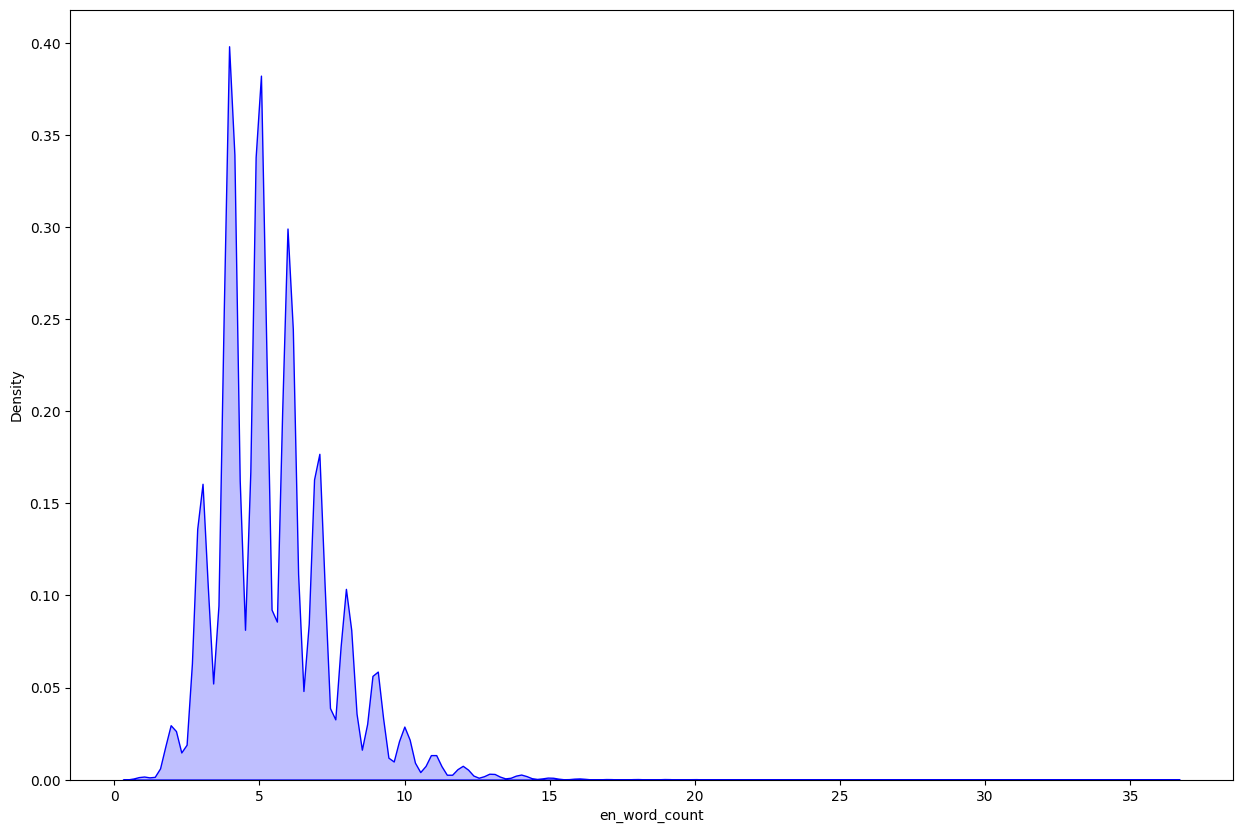

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')

In [ ]:
max(df.en_word_count)

36

In [ ]:
df.to_csv("cleanedf.csv",index=None)

Conclusion
41028 samples of sentenses

Min len of both eng and mar sentence is 1

Max len of both is 35 -- this will help for padding

And we cleaned text removed all punctuatuins digits and expanded contractions in this notebook

Training Encoder Decoder Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os


In [ ]:
df= pd.read_csv("cleanedf.csv")
df.tail()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
41024,just saying you do not like fish because of th...,हड्डींमुळे मासे आवडत नाही असं म्हणणं हे काय मा...,21,13,68,81
41025,the japanese parliament today officially elect...,आज जपानी संसदेने अधिकृतरित्या र्‍यौतारौ हाशिमो...,14,12,78,89
41026,tom tried to sell his old vcr instead of throw...,टॉमने त्याचा जुना व्हीसीआर फेकून टाकण्याऐवजी व...,25,23,129,89
41027,you cannot view flash content on an ipad howev...,आयपॅडवर फ्लॅश आशय बघता येत नाही पण तुम्ही त्या...,32,24,118,140
41028,in roger miller recorded a song called you do ...,मध्ये रॉजर मिलरने यू डोन्ट वॉन्ट माय लव्ह नावा...,36,35,149,140


Prepare dataset for encoder decoder model

Encoder:-
Here first we will convert text into numbers

WordEmbedding:- Then embedding is very important layer for beause it will convert the input word-numbers into more dimension of vectors which will have semantic information words means beause of this we can know which words are similar or near to each other.

We will not take output of timestamps of encoder beause it will be like one to one mapping so we will just take selt states of encoder as context vector.

Decoder:-
First most important thing is we have to add special tokens in each target language at start SOS and EOS at end reason of this is The length of translated sentence might not be same as other language so it is to tell model where is start and end of sentence.

When building model we will provide initial state of model as context vector recived from Encoder.

Fisrt add eos and sos tokens

SOS = Start Of String

EOS = End Of String


In [ ]:
df.Marathi = df.Marathi.apply(lambda x: 'sos '+ x +' eos')
df

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,english,sos Marathi eos,1,1,7,7
1,go,sos जा eos,1,1,2,2
2,run,sos पळ eos,1,1,2,3
3,run,sos धाव eos,1,1,3,3
4,run,sos पळा eos,1,1,3,3
...,...,...,...,...,...,...
41024,just saying you do not like fish because of th...,sos हड्डींमुळे मासे आवडत नाही असं म्हणणं हे का...,21,13,68,81
41025,the japanese parliament today officially elect...,sos आज जपानी संसदेने अधिकृतरित्या र्‍यौतारौ हा...,14,12,78,89
41026,tom tried to sell his old vcr instead of throw...,sos टॉमने त्याचा जुना व्हीसीआर फेकून टाकण्याऐव...,25,23,129,89
41027,you cannot view flash content on an ipad howev...,sos आयपॅडवर फ्लॅश आशय बघता येत नाही पण तुम्ही ...,32,24,118,140


create vocabulary of english and marathi words


In [ ]:
eng_vocab= set()
for sent in df.English:
    for word in sent.split():
        if word not in eng_vocab:
            eng_vocab.add(word)

mar_vocab= set()
for sent in df.Marathi:
    for word in sent.split():
        if word not in mar_vocab:
            mar_vocab.add(word)

len(eng_vocab), len(mar_vocab),

(5640, 13720)

In [ ]:
# for zero padding add 1 in them
ENG_VOCAB_SIZE= len(eng_vocab)+1
MAR_VOCAB_SIZE= len(mar_vocab)+1
print(ENG_VOCAB_SIZE)
print(MAR_VOCAB_SIZE)


5641
13721


Create dictionary for words and their indexes then we can convert text into numbers

First we need sorted words list

In [ ]:
eng_words = sorted(list(eng_vocab))
mar_words = sorted(list(mar_vocab))

Word to number

In [ ]:
# create english and marathi dicts
eng_word_index = dict((w, i) for i, w in enumerate(eng_words))
mar_word_index = dict((w, i) for i, w in enumerate(mar_words))
# mar_word_index

Number to word

we will need this one at time of creating text from predicted values

In [ ]:
eng_index_word = dict((i, w) for i, w in enumerate(eng_words))
mar_index_word = dict((i,w) for i, w in enumerate(mar_words))
# mar_index_word

Train test split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df.English, df.Marathi, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36926,), (4103,), (36926,), (4103,))

Create data generator

if we create array of 3d shape with our vocab size this will give us out of memmory error

And it is always best to use batches to train it will make process faster

Insted of passing all data in model which may run out of memory we create data generator which will create data batches at time of training


prepare input for encoder decoder refer
Turn the sentences into 3 Numpy arrays, encoder_input_data, decoder_input_data, decoder_target_data:

encoder_input_data is a 3D array of shape (num_pairs,max_english_sentence_length, num_english_characters) containing a one-hot vectorization of the English sentences.

decoder_input_data is a 3D array of shape (num_pairs, max_french_sentence_length, num_french_characters) containg a one-hot vectorization of the French sentences.

decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t, :] will be the same as decoder_input_data[:, t + 1, :].

Train a basic LSTM-based Seq2Seq model to predict decoder_target_data given encoder_input_data and decoder_input_data.
 Our model uses teacher forcing.

Decode some sentences to check that the model is working (i.e. turn samples from encoder_input_data into corresponding samples from decoder_target_data).

We use a technique called “Teacher Forcing” wherein the input at each time step is given as the actual output (and not the predicted output) from the previous time step.

Before we go ahead lets define some things we need for data generator

In [ ]:
### Get lengths of each sentence in list
eng_len_list=df.English.apply(lambda x: len(x.split())).to_list()

mar_len_list=df.Marathi.apply(lambda x: len(x.split())).to_list()

In [ ]:
# get max length
BATCH_SIZE= 64
max_eng_len =  np.max(eng_len_list)
max_mar_len =  np.max(mar_len_list)
max_eng_len, max_mar_len

(36, 37)

In [ ]:
df['Marathi'].values

array(['sos Marathi eos', 'sos जा eos', 'sos पळ eos', ...,
       'sos टॉमने त्याचा जुना व्हीसीआर फेकून टाकण्याऐवजी विकून टाकण्याचा प्रयत्न केला पण विकत घ्यायला कोणीच तयार नव्हतं म्हणून त्याला तो शेवटी फेकूनच टाकायला लागला eos',
       'sos आयपॅडवर फ्लॅश आशय बघता येत नाही पण तुम्ही त्या वेब पानांचे यूआरएल स्वतःला ईमेल करून तोच आशय घरी पोहोचल्यावर आपल्या रोजच्या संगणकावर पाहू शकता eos',
       'sos मध्ये रॉजर मिलरने यू डोन्ट वॉन्ट माय लव्ह नावाचं गाणं रेकॉर्ड केलं आज हे गाणं इन द समर टाइम म्हणून जास्त प्रसिद्ध आहे त्याने लिहिलेलं व गायलेलं हे असं पहिलं गाणं होतं जे लोकप्रिय झालं eos'],
      dtype=object)

In [ ]:
train_preprocessed_input = df['English'].to_numpy()
train_preprocessed_target = df['Marathi'].to_numpy()
train_preprocessed_input

array(['english', 'go', 'run', ...,
       'tom tried to sell his old vcr instead of throwing it away but no one would buy it so he ended up throwing it away',
       'you cannot view flash content on an ipad however you can easily email yourself the urls of these web pages and view that content on your regular computer when you get home',
       'in roger miller recorded a song called you do not want my love today this song is better known as in the summer time it is the first song he wrote and sang that became popular'],
      dtype=object)

In [ ]:

source_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<unk>')
source_tokenizer.fit_on_texts(train_preprocessed_input)
# source_tokenizer.get_config()

In [ ]:
source_vocab_size = len(source_tokenizer.word_index) + 1
print(source_vocab_size)

5642


In [ ]:
target_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<unk>')
target_tokenizer.fit_on_texts(train_preprocessed_target)
# target_tokenizer.get_config()

In [ ]:
target_vocab_size = len(target_tokenizer.word_index) + 1
print(target_vocab_size)

13722


In [ ]:
train_encoder_inputs = source_tokenizer.texts_to_sequences(train_preprocessed_input)
print(train_encoder_inputs[:3])
print(source_tokenizer.sequences_to_texts(train_encoder_inputs[:3]))

[[96], [39], [400]]
['english', 'go', 'run']


In [ ]:
def generate_decoder_inputs_targets(sentences, tokenizer):
  seqs = tokenizer.texts_to_sequences(sentences)
  decoder_inputs = [s[:-1] for s in seqs] # Drop the last token in the sentence.
  decoder_targets = [s[1:] for s in seqs] # Drop the first token in the sentence.

  return decoder_inputs, decoder_targets

In [ ]:
train_decoder_inputs, train_decoder_targets = generate_decoder_inputs_targets(train_preprocessed_target ,
                                                                              target_tokenizer)

In [ ]:
# train_decoder_inputs[:3]
# train_preprocessed_target
# print(target_tokenizer.sequences_to_texts(train_decoder_inputs[:3]))

In [ ]:
max_encoding_len = len(max(train_encoder_inputs, key=len))
max_encoding_len

36

In [ ]:
max_decoding_len = len(max(train_decoder_inputs, key=len))
max_decoding_len

36

In [ ]:
padded_train_encoder_inputs = pad_sequences(train_encoder_inputs, max_encoding_len, padding='post', truncating='post')
padded_train_decoder_inputs = pad_sequences(train_decoder_inputs, max_decoding_len, padding='post', truncating='post')
padded_train_decoder_targets = pad_sequences(train_decoder_targets, max_decoding_len, padding='post', truncating='post')

In [ ]:
print(padded_train_encoder_inputs[689])
print(padded_train_decoder_inputs[689])
print(padded_train_decoder_targets[689])

[1650   54    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[  2 459 906 162   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[459 906 162   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
target_tokenizer.sequences_to_texts([padded_train_decoder_inputs[689]])

['sos त्यांचा पाठलाग करा <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>']

In [ ]:
embedding_dim = 128
hidden_dim = 256
default_dropout=0.2
batch_size = 32
epochs = 30

In [ ]:
# The initial encoder input layer which will take in padded sequences. We're specifying
# a shape of None here but you can specify it upfront if you want since we
# know what the max encoding length is.
encoder_inputs = layers.Input(shape=[None], name='encoder_inputs')

# The embedding layer. Similar to what we did in the RNN demo.
encoder_embeddings = layers.Embedding(source_vocab_size,
                                      embedding_dim,
                                      mask_zero=True,
                                      name='encoder_embeddings')

# Passing the input layer output to the embedding layer creates a link between the
# two. Input sequences will now flow into the embedding layer which will output
# a sequence of embeddings.
encoder_embedding_output = encoder_embeddings(encoder_inputs)


# We're not using any kind of attention mechanism in this model, so setting only
# return_state to True is enough. return_sequences remains False.
encoder_lstm = layers.LSTM(hidden_dim,
                           return_state=True,
                           dropout=default_dropout,
                           name='encoder_lstm')

# Passing the embedding layer output to the LSTM layer creates another link.
# IMPORTANT: The LSTM always returns three values. When return_sequences is
# False, encoder_outputs and state_h are the SAME. When return_sequences is
# True, encoder_outputs contains the encoder hidden states from each time step.
#
# Side note: we won't be using encoder_outputs here so that variable can be
# replaced with a _ if preferred.
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding_output)

# The final hidden and cell/context states from the encoder will be the the
# initial states for the decoder.
encoder_states = (state_h, state_c)

In [ ]:
decoder_inputs = layers.Input(shape=[None], name='decoder_inputs')


decoder_embeddings = layers.Embedding(target_vocab_size,
                                      embedding_dim,
                                      mask_zero=True,
                                      name='decoder_embeddings')


decoder_embedding_output = decoder_embeddings(decoder_inputs)

# Return sequences set to True.
decoder_lstm = layers.LSTM(hidden_dim,
                           return_sequences=True,
                           return_state=True,
                           dropout=default_dropout,
                           name='decoder_lstm')


# Set the decoder's initial state to the encoder's final output states. Since
# return_sequences is set to True, decoder_outputs is going to be a collection of
# the decoder's hidden state at each timestep. Also note that since we don't need
# the decoder's final hidden output and cell states, those are just set to _.
decoder_outputs, _, _ = decoder_lstm(decoder_embedding_output, initial_state=encoder_states)

# Have a softmax layer in the end to create a probability distribution for the output word.
decoder_dense = layers.Dense(target_vocab_size, activation='softmax', name='decoder_dense')

# The probability distribution for the output word.
y_proba = decoder_dense(decoder_outputs)


In [ ]:
# Note how the model is taking two inputs in an array.
model = tf.keras.Model([encoder_inputs, decoder_inputs], y_proba, name='eng_to_mar_model')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics='sparse_categorical_accuracy')
model.summary()

Model: "eng_to_mar_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 encoder_embeddings (Embedd  (None, None, 128)            722176    ['encoder_inputs[0][0]']      
 ing)                                                                              

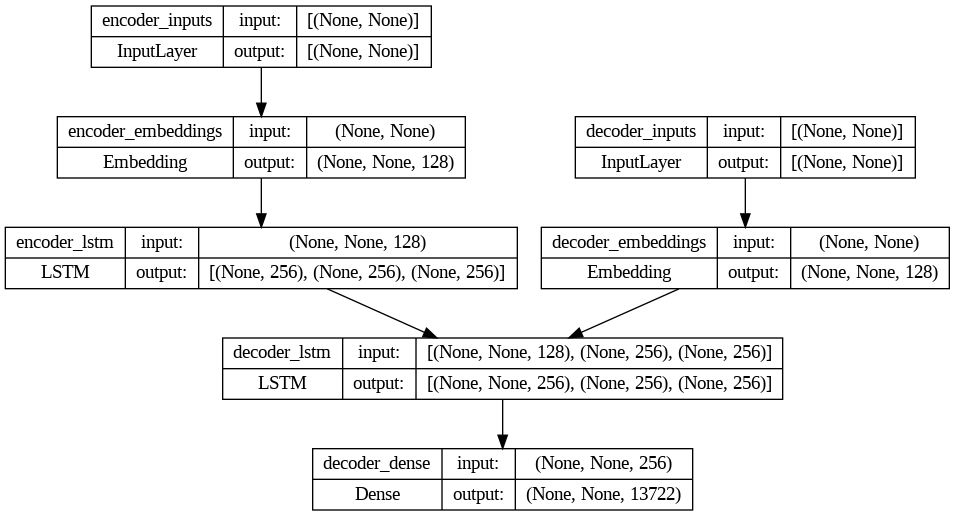

In [ ]:


from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='eng_to_mar_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
print('encoder_inputs layer\n input dimension {}\n output dimension: {}'.format((batch_size, max_encoding_len), (batch_size, max_encoding_len)))
print()
print('encoder_embeddings layer\n input dimension {}\n output dimension: {}'.format((batch_size, max_encoding_len), (batch_size, max_encoding_len, embedding_dim)))
print()
print('encoder_lstm layer\n input dimension {}\n output dimension: {}'.format((batch_size, max_encoding_len, embedding_dim), [(batch_size, hidden_dim), (batch_size, hidden_dim), (batch_size, hidden_dim)]))
print()
print()
print('decoder_inputs layer\n input dimension {}\n output dimension: {}'.format((batch_size, max_decoding_len), (batch_size, max_decoding_len)))
print()
print('decoder_embeddings layer\n input dimension {}\n output dimension: {}'.format((batch_size, max_decoding_len), (batch_size, max_decoding_len, embedding_dim)))
print()
print('decoder_lstm layer\n input dimension {}\n output dimension: {}'.format([(batch_size, max_decoding_len, embedding_dim), (batch_size, hidden_dim), (batch_size, hidden_dim)], [(batch_size, max_decoding_len, hidden_dim), (batch_size, hidden_dim), (batch_size, hidden_dim)]))
print()
print('decoder_dense layer(softmax)\n input dimension {}\n output dimension: {}'.format((batch_size, max_decoding_len, hidden_dim), (batch_size, max_decoding_len, target_vocab_size)))

encoder_inputs layer
 input dimension (32, 36)
 output dimension: (32, 36)

encoder_embeddings layer
 input dimension (32, 36)
 output dimension: (32, 36, 128)

encoder_lstm layer
 input dimension (32, 36, 128)
 output dimension: [(32, 256), (32, 256), (32, 256)]


decoder_inputs layer
 input dimension (32, 36)
 output dimension: (32, 36)

decoder_embeddings layer
 input dimension (32, 36)
 output dimension: (32, 36, 128)

decoder_lstm layer
 input dimension [(32, 36, 128), (32, 256), (32, 256)]
 output dimension: [(32, 36, 256), (32, 256), (32, 256)]

decoder_dense layer(softmax)
 input dimension (32, 36, 256)
 output dimension: (32, 36, 13722)


In [ ]:
# Saving this to a folder on my collab
filepath="model_weights.h5"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit([padded_train_encoder_inputs, padded_train_decoder_inputs], padded_train_decoder_targets,
                     batch_size=batch_size,
                     epochs=epochs,
                    #  validation_data=([padded_val_encoder_inputs, padded_val_decoder_inputs], padded_val_decoder_targets),
                     callbacks=[cp_callback, es_callback])

Epoch 1/30
1283/1283 [==============================] - ETA: 0s - loss: 5.5087 - sparse_categorical_accuracy: 0.2290
Epoch 1: saving model to model_weights.h5


1283/1283 [==============================] - 71s 43ms/step - loss: 5.5087 - sparse_categorical_accuracy: 0.2290
Epoch 2/30
1283/1283 [==============================] - ETA: 0s - loss: 4.1913 - sparse_categorical_accuracy: 0.3403
Epoch 2: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 4.1913 - sparse_categorical_accuracy: 0.3403
Epoch 3/30
1283/1283 [==============================] - ETA: 0s - loss: 3.1951 - sparse_categorical_accuracy: 0.4388
Epoch 3: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 3.1951 - sparse_categorical_accuracy: 0.4388
Epoch 4/30
1283/1283 [==============================] - ETA: 0s - loss: 2.4761 - sparse_categorical_accuracy: 0.5197
Epoch 4: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 2.4761 - sparse_categorical_accuracy: 0.5197
Epoch 5/30
1283/1283 [==============================] - ETA: 0s - loss: 1.9390 - sparse_categorical_accuracy: 0.5908
Epoch 5: saving model to model_weights.h5


1283/1283 [==============================] - 49s 38ms/step - loss: 1.9390 - sparse_categorical_accuracy: 0.5908
Epoch 6/30
1283/1283 [==============================] - ETA: 0s - loss: 1.5402 - sparse_categorical_accuracy: 0.6499
Epoch 6: saving model to model_weights.h5


1283/1283 [==============================] - 47s 36ms/step - loss: 1.5402 - sparse_categorical_accuracy: 0.6499
Epoch 7/30
1282/1283 [============================>.] - ETA: 0s - loss: 1.2418 - sparse_categorical_accuracy: 0.7027
Epoch 7: saving model to model_weights.h5


1283/1283 [==============================] - 47s 36ms/step - loss: 1.2418 - sparse_categorical_accuracy: 0.7027
Epoch 8/30
1282/1283 [============================>.] - ETA: 0s - loss: 1.0199 - sparse_categorical_accuracy: 0.7450
Epoch 8: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 1.0199 - sparse_categorical_accuracy: 0.7450
Epoch 9/30
1283/1283 [==============================] - ETA: 0s - loss: 0.8544 - sparse_categorical_accuracy: 0.7777
Epoch 9: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.8544 - sparse_categorical_accuracy: 0.7777
Epoch 10/30
1283/1283 [==============================] - ETA: 0s - loss: 0.7312 - sparse_categorical_accuracy: 0.8021
Epoch 10: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 0.7312 - sparse_categorical_accuracy: 0.8021
Epoch 11/30
1283/1283 [==============================] - ETA: 0s - loss: 0.6356 - sparse_categorical_accuracy: 0.8219
Epoch 11: saving model to model_weights.h5


1283/1283 [==============================] - 46s 36ms/step - loss: 0.6356 - sparse_categorical_accuracy: 0.8219
Epoch 12/30
1283/1283 [==============================] - ETA: 0s - loss: 0.5595 - sparse_categorical_accuracy: 0.8384
Epoch 12: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.5595 - sparse_categorical_accuracy: 0.8384
Epoch 13/30
1283/1283 [==============================] - ETA: 0s - loss: 0.5053 - sparse_categorical_accuracy: 0.8490
Epoch 13: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.5053 - sparse_categorical_accuracy: 0.8490
Epoch 14/30
1283/1283 [==============================] - ETA: 0s - loss: 0.4559 - sparse_categorical_accuracy: 0.8593
Epoch 14: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.4559 - sparse_categorical_accuracy: 0.8593
Epoch 15/30
1283/1283 [==============================] - ETA: 0s - loss: 0.4191 - sparse_categorical_accuracy: 0.8678
Epoch 15: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.4191 - sparse_categorical_accuracy: 0.8678
Epoch 16/30
1283/1283 [==============================] - ETA: 0s - loss: 0.3906 - sparse_categorical_accuracy: 0.8726
Epoch 16: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8726
Epoch 17/30
1283/1283 [==============================] - ETA: 0s - loss: 0.3662 - sparse_categorical_accuracy: 0.8787
Epoch 17: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3662 - sparse_categorical_accuracy: 0.8787
Epoch 18/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.3467 - sparse_categorical_accuracy: 0.8821
Epoch 18: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3467 - sparse_categorical_accuracy: 0.8821
Epoch 19/30
1283/1283 [==============================] - ETA: 0s - loss: 0.3286 - sparse_categorical_accuracy: 0.8860
Epoch 19: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8860
Epoch 20/30
1283/1283 [==============================] - ETA: 0s - loss: 0.3148 - sparse_categorical_accuracy: 0.8891
Epoch 20: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3148 - sparse_categorical_accuracy: 0.8891
Epoch 21/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.3040 - sparse_categorical_accuracy: 0.8914
Epoch 21: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.3040 - sparse_categorical_accuracy: 0.8914
Epoch 22/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.2936 - sparse_categorical_accuracy: 0.8932
Epoch 22: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2936 - sparse_categorical_accuracy: 0.8932
Epoch 23/30
1283/1283 [==============================] - ETA: 0s - loss: 0.2867 - sparse_categorical_accuracy: 0.8956
Epoch 23: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2867 - sparse_categorical_accuracy: 0.8956
Epoch 24/30
1283/1283 [==============================] - ETA: 0s - loss: 0.2786 - sparse_categorical_accuracy: 0.8969
Epoch 24: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8969
Epoch 25/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.2724 - sparse_categorical_accuracy: 0.8984
Epoch 25: saving model to model_weights.h5


1283/1283 [==============================] - 48s 37ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.8984
Epoch 26/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.2663 - sparse_categorical_accuracy: 0.8994
Epoch 26: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2663 - sparse_categorical_accuracy: 0.8994
Epoch 27/30
1283/1283 [==============================] - ETA: 0s - loss: 0.2627 - sparse_categorical_accuracy: 0.9001
Epoch 27: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2627 - sparse_categorical_accuracy: 0.9001
Epoch 28/30
1282/1283 [============================>.] - ETA: 0s - loss: 0.2582 - sparse_categorical_accuracy: 0.9013
Epoch 28: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2582 - sparse_categorical_accuracy: 0.9013
Epoch 29/30
1283/1283 [==============================] - ETA: 0s - loss: 0.2533 - sparse_categorical_accuracy: 0.9025
Epoch 29: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2533 - sparse_categorical_accuracy: 0.9025
Epoch 30/30
1283/1283 [==============================] - ETA: 0s - loss: 0.2516 - sparse_categorical_accuracy: 0.9027
Epoch 30: saving model to model_weights.h5


1283/1283 [==============================] - 45s 35ms/step - loss: 0.2516 - sparse_categorical_accuracy: 0.9027


In [ ]:
###### Save the model.
model.save('eng_mar_model')


###### Zip and download the model.
# !zip -r ./hun_eng_s2s_nmt_no_attention.zip ./hun_eng_s2s_nmt_no_attention
# files.download("./hun_eng_s2s_nmt_no_attention.zip")


###### Save the tokenizers as JSON files. The resulting files can be downloaded by left-clicking on them.
# source_tokenizer_json = source_tokenizer.to_json()
# with io.open('source_tokenizer.json', 'w', encoding='utf-8') as f:
#   f.write(json.dumps(source_tokenizer_json, ensure_ascii=False))

# target_tokenizer_json = target_tokenizer.to_json()
# with io.open('target_tokenizer.json', 'w', encoding='utf-8') as f:
#   f.write(json.dumps(target_tokenizer_json, ensure_ascii=False))